statsmodels를 사용한 시계열 분석
- 연속적인 시간에서 얻은 값들로 이루어진 수열
- 데이터를 이용하여 다음 공격을 준비하는 해커 그룹의 공모와 같은 사이버 공격 예측 가능

In [1]:
pip install matplotlib statsmodels scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 3.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 6.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 6.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.2/258.2 kB 5.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 6.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 6.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 5.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
# 시계열 데이터 생성
from random import random
time_series = [2 * x + random() for x in range(1, 100)]

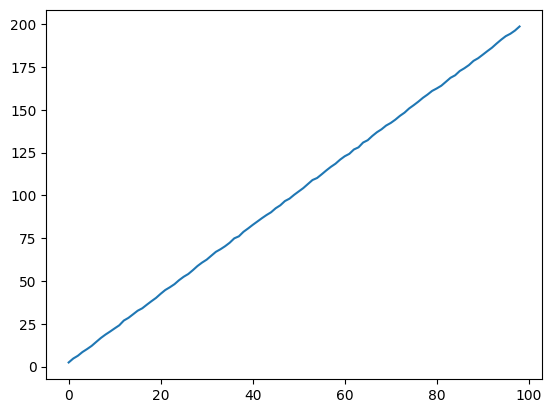

In [6]:
# 데이터를 그래프로 나타냄
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(time_series)
plt.show()

## 시계열의 연속 값을 예측하는 데 사용할 수 있는 다양한 기법이 존재
 1. 자동회귀(AR: AutoRegression): 
- 이전 입력에서 측정값을 가져와 스퀀스의 다음 성분을 자동으로 예측하는 모델
- 수학적모델: 

In [12]:

from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(time_series, lags=20)
model_fit = model.fit()
y = model_fit.predict(len(time_series), len(time_series))
print(f"자동회귀 모델 예측 결과: {y[0]:.4f}")

자동회귀 모델 예측 결과: 200.3670


In [5]:
# 훈련한 모델의 매개변수
model_fit.params

array([13.52904896,  0.0387842 ,  0.20658747,  0.2626664 , -0.23256276,
        0.1341352 ,  0.13259913,  0.17487147, -0.13811329, -0.02630609,
        0.06267792,  0.13943178,  0.24528964])

2. 이동평균(MA, Moving Average)
- 시계열은 평균에 관해 변동하는 것으로 모델링 됨
- 잡음이 있는 선형 시계열 모델을 제대로 예측 불가
- 수학적 모델: 

In [28]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(time_series, order=(0, 0, 60))
model_fit = model.fit()
y = model_fit.predict(len(time_series), len(time_series))
print(f"이동평균 모델 예측 결과: {y[0]:.4f}")

/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


이동평균 모델 예측 결과: 199.8887


In [26]:
# 훈련한 모델의 매개변수
model_fit.params

array([100.44926376,   2.71915081,   4.93072301,   8.44626092,
        12.3651223 ,  16.14308378,  19.18855329,  20.94450837,
        21.04266512,  18.82338832,  15.28310523,  10.53627401,
         4.67780624,  -1.10579724,  -6.63986469, -11.53830339,
       -15.9807257 , -19.32900221, -21.50804162, -22.97441811,
       -22.82426682, -21.06614901, -17.7022914 , -12.90427961,
        -6.90625445,  -0.33354467,   5.52640319,  10.23225539,
        12.78114606,  12.5646457 ,   9.87191829,   4.96150644,
        -1.22106955,  -7.93679855, -14.03378161, -18.79098546,
       -22.0691759 , -23.48221492, -23.20245592, -21.67229871,
       -18.95721127, -15.17694533, -10.6472697 ,  -5.60292787,
        -0.17684994,   5.28065907,  10.21647936,  14.24941752,
        17.15581179,  18.59466646,  18.45827939,  17.15245874,
        14.92428405,  12.05537203,   9.05739998,   6.37970874,
         4.11313996,   2.37523845,   1.22763222,   0.5844051 ,
         0.2007926 ,  36.8950538 ])

3. 단순지수평활(SES, Simple Exponential Smoothing)
- 오래된 데이터에는 낮은 가중치를, 최근 데이터에는 높은 가중치를 부여하여 최근의 경향을 잘 반영하는 방법
- ℓt=αyt+(1−α)ℓt−1

In [30]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(time_series)
model_fit = model.fit()
y = model_fit.predict(len(time_series), len(time_series))
print(f'단순지수평활 모델의 예측 결과 : {y[0]:4f}')

단순지수평활 모델의 예측 결과 : 198.591928


In [31]:
# 훈련한 모델의 매개변수
model_fit.params

{'smoothing_level': 0.9999999850988339,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2.381657586395786,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}